# Representando Dados e Engenharia de Features

Vimos no capítulo 2 que realizar o *scalling* das features contínuas é muito importante, para deixar elas na mesma forma de medida, por exemplo. Outra coisa importante é lidar com as **variáveis categóricas**, para que elas sejam entendidas pelo algoritmo.
<br>

Até agora só aplicamos aos algoritmos datasets bidimensionais, com valores numéricos e contínuos. Mas esses valores tratados estão longe de ser os mais comuns (com exceção de datasets já limpos em sites como o **kaggle**). 

## Categorical Variables

Utilizando um dataset da renda de adultos americanos derivado do censo de 1994, podemos observar diversas variáveis categóricas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn

url = "https://raw.githubusercontent.com/amueller/introduction_to_ml_with_python/master/data/adult.data"
df = pd.read_csv(url, header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])

df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Além da idade, das horas semanais trabalhadas e aquelas relacionadas ao valor de capital, todas as outras váriaveis desse dataset são categóricas. Aí entram:
* Educação (numérica ou não)
* Classe do trabalho
* Status de relacionamento
* Raça
e etc...

### One-Hot-Encoding (Dummy Variables)

In [2]:
# Vou cortar o dataframe para que facilite a visualização da mudança nas colunas
df = df[['age', 'workclass', 'education', 'gender', 'hours-per-week'
        , 'occupation', 'income']]

df.head(5)

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


Antes de fazer qualquer mudança nos dados categóricos, é válido dar uma olhada pra ver se eles estão de acordo com o que tu espera. Supondo que o dataset seja feito a partir de uma **survey** de um site, alguém poderia escrever *Man* como genêro ao invés de *Male*. 
<br>

Uma forma de verificar os valores de uma coluna categórica é usando o `value_counts()`:

In [3]:
df['gender'].value_counts()

 Male      21790
 Female    10771
Name: gender, dtype: int64

In [4]:
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

A forma mais simples de fazer **one-hot-encoding** no pandas é utilizando a função `get_dummies`, que transforma toda variável categórica automaticamente:

In [5]:
print("Features originais:\n", list(df.columns), "\n")
df_dummies = pd.get_dummies(df)
print("Features depois do get_dummies:\n", list(df_dummies.columns))

Features originais:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Features depois do get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine

In [6]:
features = df_dummies.loc[:, 'age':'occupation_ Transport-moving']

# Separar o X e o y

X = features.values
y = df_dummies['income_ >50K'].values
print("X.shape: {} y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44) y.shape: (32561,)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression(max_iter = 2000)
logreg.fit(X_train, y_train)

print(f"Test score: {logreg.score(X_test, y_test)}")

Test score: 0.8092371944478566


Por motivos óbvios, é importante utilizar o `get_dummies` antes de separar o training e o test set. 

### Dados Categóricos como Integers

Assim como é comum os dados categóricos serem escritos, também é comum eles serem marcados como integers. Isso evita erros de escrita pra quem está coletando os dados e facilita o armazenamento.
<br>

Dados catégoricos coletados como integers devem ser tratados como dados categóricos e não contínuos. Como a função `get_dummies` só transforma dados que estão em formato de string, precisamos usar uma segunda função (ou transofrmar os int em string).

In [8]:
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1],
 'Categorical Feature': ['socks', 'fox', 'socks', 'box']})

demo_df

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [9]:
# O get_dummies não reconhece a primeira coluna
pd.get_dummies(demo_df)

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [10]:
# Podemos transforma-la em str
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)

pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature'])

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


## Binning, Discretization, Modelos Lineares e de Árvore

A **representação dos dados deve levar em consideração também o modelo que será usado para fazer a previsão**. Modelos lineares e modelos baseados em árvores lidam com os dados de forma bem diferente um do outro. 

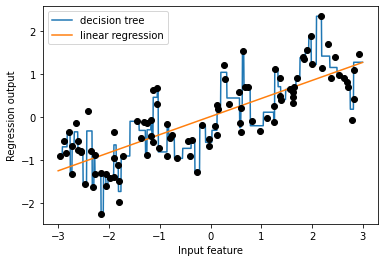

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

dtreg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, dtreg.predict(line), label="decision tree")

lreg = LinearRegression().fit(X, y)
plt.plot(line, lreg.predict(line), label="linear regression")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

Por causa da forma que eles funcionam, os resultados gerados pelos dois modelos são bem diferentes. Em um dataset com apenas uma feature como é o caso do `make_wave`, o **linear regression só consegue prever uma linha**. 
<br>

Uma forma de deixar um modelo linear mais forte - em um dataset com poucas (ou uma) features - é utilizar a estratégia de **binning**, que também é chamada de **discretization**. Ela consiste em transformar uma feature contínua em múltiplas features utilizando *bins*, como em um histograma.

In [12]:
bins = np.linspace(-3, 3, 11)
print(f"bins: {bins}")

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


Acima, uma pequena parte do input range da feature contínua foi particionado em 10 bins (do -3 ao 3). Então, usamos a função do numpy chamada `np.digitize` para alocar cada ponto da feature em uma bin, de acordo com seu valor.  

In [13]:
which_bin = np.digitize(X, bins = bins)
print(f"Primeiros 5 datapoints\n {X[:5]}")
print(f"Bin que ele foi alocado\n {which_bin[:5]}")

Primeiros 5 datapoints
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Bin que ele foi alocado
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


Pronto! A feature única e contínua foi transformada em múltiplas features categóricas que mostram em qual bin o o valor foi alocado. Agora, podemos arrumar o dataset, adicionando as novas features usando o OneHotEncoder do scikit-learn:

In [14]:
from sklearn.preprocessing import OneHotEncoder

# o onehotencoder funciona de forma parecida ao get_dummies do pandas, mas aceita categorias em int
encoder = OneHotEncoder(sparse = False)
encoder.fit(which_bin)

# criando o novo X
X_binned = encoder.transform(which_bin)

X_binned[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

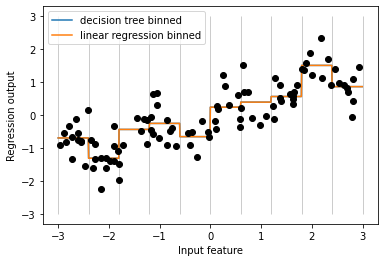

In [15]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

dtreg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, dtreg.predict(line_binned), label="decision tree binned")

lreg = LinearRegression().fit(X_binned, y)
plt.plot(line, lreg.predict(line_binned), label="linear regression binned")

plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

Após a aplicação do método, ambos os modelos obtiveram o mesmo resultado. Plotando a linha dos bins na figura, podemos ver que os resultados do modelo ficam bem de acordo com os bins.
<br>

Uitlizar o **binning** não tem efeitos beneficiais a modelos de árvore (uma vez que o algoritmo aprende quais são os melhores bins sozinho) e deve ser guardado para algoritmos lineares. Se existem motivos bons para o uso de um modelo linear ao invés de um baseado em árvore - como o tamanho do dataset, por exemplo - binning é uma forma interessante de aumentar o poder do modelo.

## Interações e Polinomiais

Outra forma de enriquecer uma representação de features, principalmente para modelos lineares, é adicionar features de interação e/ou features polinomiais dos dados originais. 
<br>
Para exemplificar, inicialmente eu vou combinar o X_binned criado acima com o X normal, criando assim um coeficiente angular para a linha criada pela linear regression. 

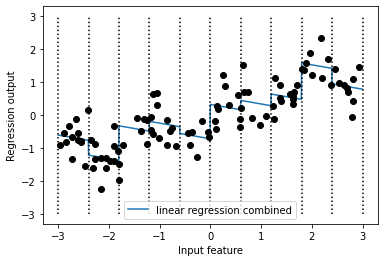

In [16]:
X_combined = np.hstack([X, X_binned])

reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k');
    plt.legend(loc="best")
    
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k');

No exexmplo acima, além de ter aprendido um coeficiente linear para cada bin, o modelo também aprendeu um coeficiente angular para a linha inteira. Uma forma de obter resultados ainda melhores é criando uma interação entre cada bin e o X original, criando, dessa forma, um coeficiente angular para cada um dos bins.

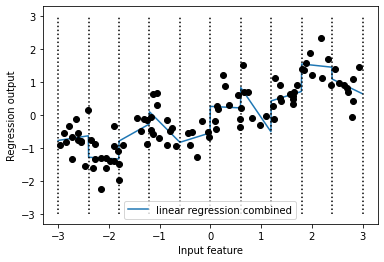

In [17]:
X_product = np.hstack([X_binned, X*X_binned])

reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression combined')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k');
    plt.legend(loc="best")
    
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k');

Agora cada bin tem seu próprio coeficiente angular e linear, aumentando muito mais a **flexibilidade** do modelo ao dataset de treino. Além de aplicar interações ao binning, podemos utilizar **polinômios** das features originais. O próprio sklearn tem um método implementado no modulo de pré-processamento pronto para isso.

In [18]:
from sklearn.preprocessing import PolynomialFeatures

# Vamos incluir polinomios até a décima potência
poly = PolynomialFeatures(degree = 10)
poly.fit(X)
X_poly = poly.transform(X)

In [19]:
print("X:\n{}\n\n".format(X[:5]))
print("X_poly:\n{}\n\n".format(X_poly[:5]))
print(f"Features do X_poly: {poly.get_feature_names()}")

X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]


X_poly:
[[ 1.00000000e+00 -7.52759287e-01  5.66646544e-01 -4.26548448e-01
   3.21088306e-01 -2.41702204e-01  1.81943579e-01 -1.36959719e-01
   1.03097700e-01 -7.76077513e-02  5.84199555e-02]
 [ 1.00000000e+00  2.70428584e+00  7.31316190e+00  1.97768801e+01
   5.34823369e+01  1.44631526e+02  3.91124988e+02  1.05771377e+03
   2.86036036e+03  7.73523202e+03  2.09182784e+04]
 [ 1.00000000e+00  1.39196365e+00  1.93756281e+00  2.69701700e+00
   3.75414962e+00  5.22563982e+00  7.27390068e+00  1.01250053e+01
   1.40936394e+01  1.96178338e+01  2.73073115e+01]
 [ 1.00000000e+00  5.91950905e-01  3.50405874e-01  2.07423074e-01
   1.22784277e-01  7.26822637e-02  4.30243318e-02  2.54682921e-02
   1.50759786e-02  8.92423917e-03  5.28271146e-03]
 [ 1.00000000e+00 -2.06388816e+00  4.25963433e+00 -8.79140884e+00
   1.81444846e+01 -3.74481869e+01  7.72888694e+01 -1.59515582e+02
   3.29222321e+02 -6.79478050e+02  1.40236670e+

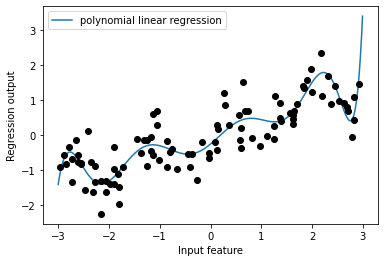

In [20]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

Dá pra perceber com facilidade que o modelo acaba ficando bem mais *smooth* sem a binarização e aplicando os polinômios. Ainda assim, polinômios de grau alto, como é o caso de uma potência na 10, tendem a se comportar de forma extrema com a falta de dados (ao exemplo do final do gráfico).
<br>

Como vimos no capítulo 2, o SVR ~~meio que~~ utiliza polinômios do dado original para fitar a melhor função ao dataset. Vamos ver como o resultado ficaria se utilizassemos ele no dataset original, sem a utilização de polinômios:

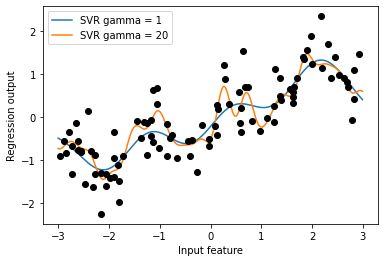

In [21]:
from sklearn.svm import SVR

# vamos testar com dois coeficientes diferentes para o kernel
for gamma in [1, 20]:
    svr = SVR(gamma = gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label = f'SVR gamma = {gamma}')

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

Utilizando um modelo complexo, como o Kernel SVM (RBF), a função aprendida é similar (principalmente do gamma = 1) àquela obtida utilizando transformação polinômial. Saindo um pouco do dataset sintético, vamos utilizar as engenharias de feature aprendidas em um dataset verdadeiro.

In [22]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state = 0)

# rescalonando os dados
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# aplicando a engenharia de features
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print(f"X_train.shape: {X_train.shape}")
print(f"X_train_poly.shape: {X_train_poly.shape}")

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


Utilizando apenas degree = 2, um dataset de 13 features foi transformado em um de 105. Isso se deu porque o PolynomialFeatures cria interações entre as features já existentes (nesse caso, de no máximo uma featurex * featurey e a feature ao quadrado). Vamos usar o `ridge`, um modelo linear com regularização L2, para treinar o modelo e observar os resultados:

In [23]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train_scaled, y_train)
print(f"Score do Ridge sem interações polinomiais:{ridge.score(X_test_scaled, y_test)}")

ridge_poly = Ridge().fit(X_train_poly, y_train)
print(f"Score do Ridge com interações polinomiais:{ridge_poly.score(X_test_poly, y_test)}")

Score do Ridge sem interações polinomiais:0.6214583227921036
Score do Ridge com interações polinomiais:0.7534782020980575


Deu pra ver uma melhora considerável quando trocamos o dataset. No entanto, isso não ocorre em modelos mais complexos, como em ensembles de trees.

In [24]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor().fit(X_train_scaled, y_train)
print(f"Score do RandomForestRegressor sem interações polinomiais:{rf.score(X_test_scaled, y_test)}")

rf_poly = RandomForestRegressor().fit(X_train_poly, y_train)
print(f"Score do RandomForestRegressor com interações polinomiais:{rf_poly.score(X_test_poly, y_test)}")

Score do RandomForestRegressor sem interações polinomiais:0.788430586309986
Score do RandomForestRegressor com interações polinomiais:0.7759039711421384


Pelo contrário! Além do score do RandomForest ter sido superior ao do Ridge sem a transformação, o uso dos polinomios e dos interativos inclusive fez o score piorar.

## Transformações Não-Lineares Univariadas

Como visto nesse e nos capítulos passados, modelos lineares funcionam bem com algumas transformações de features. No geral, esses modelos se importam bastante com o escalonamento e a distribuição do dataset. 
<br>

Quando alguma das features tem uma relação não linear com o y, pode ficar difícil pro modelo capturar o que você gostaria da feature em questão. Funções transformadoras como `log` e `exp` podem ser eficazes e eficientes na normalização de alguma feature. Para exemplificar, vamos criar um dataset de contagem (pense em algo do tipo "quantas vezes o usuário X entrou hoje") e aplicar uma transformação.

Text(0.5, 0, 'Value')

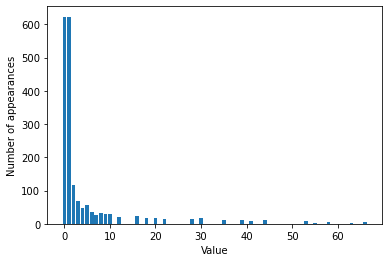

In [25]:
rnd = np.random.RandomState(2)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

bins = np.bincount(X[:, 0])
plt.bar(height = range(len(bins)), x = bins)
plt.ylabel("Number of appearances")
plt.xlabel("Value")

Distribuições desse tipo são muito comuns mas modelos lineares não lidam muito bem. Vamos aplicar esse dataset em um modelo linear:

In [26]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print(f"Test score: {score:.3f}")

Test score: 0.549


O score não é muito bom, com R² aproximando 0.55. O Ridge não foi capaz de capturar a relação entre o x e o y. 

Se utilizarmos uma transformação logarítimica, que aproxima o dataset da curva normal, será possível ver uma melhora expressiva: 

Text(0.5, 0, 'Value')

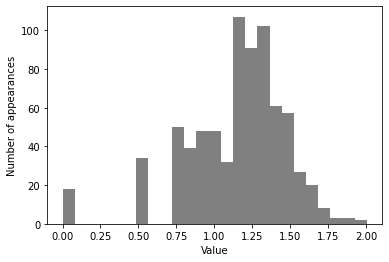

In [27]:
# + 1 devido log

X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

# Dist mais próxima da normalização

plt.hist(np.log(X_train_log[:, 0] + 1), bins=25, color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [28]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)

print(f"Test score: {score:.3f}")

Test score: 0.881


Como deu pra ver, modelos lineares e outros mais simples (como naive Bayes) se aproveitam muito de transformações logarítimicas, polinomiais e também de binning. Novamente, isso não necessariamente ocorrerá em ensembles, uma vez que eles são capazes de lidar com esse tipo de dado e descobrir interações através do algoritmo padrão - vale a pena testar, mas normalmente o resultado é inferior ao dataset padrão.

Modelos como SVMs, NNs e k-NN podem se beneficiar também dessas interações polinomiais e transformações, mas geralmente não tanto quanto os modelos lineares tradicionais.